# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Hữu Khánh
- MSSV: 21127072
- Lớp: 22CLC03

# Import

In [2]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

# Đọc dữ liệu

In [3]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Khởi tạo 
kf = KFold(n_splits=5, shuffle=False)
indices = np.arange(len(X_train))
np.random.shuffle(indices)

# Cài đặt hàm

In [4]:
# Cài đặt các hàm cần thiết ở đây

def fit(X_train, y_train):
    ''' 
    This function is used to train the model.
    
    Input:
    - X_train (pd.DataFrame): Input data for training the model
    - y_train (pd.Series): Corresponding labels of the data
    
    Output:
    - W: weight matrix of the linear regression model 
    
    '''
    
    A = np.array(X_train)
    A = np.hstack((np.ones((A.shape[0], 1)), A))
    b = y_train.to_numpy()
    W = np.linalg.inv(A.T @ A) @ A.T @ b
    
    return W

def predict(W, X_test):
    '''
    This function is used to predict house prices based on input data and learned weight matrix.
    
    Input:
    - W (np.array): learned weight matrix from fit function
    - X_test (pd.DataFrame): Input data to predict
    
    Output:
    - y_pred (pd.Series): model prediction result on X_test data, rounded to 3 decimal places 
    
    '''
    
    A = np.array(X_test)
    A = np.hstack((np.ones((A.shape[0], 1)), A))
    y_pred = A @ W
    
    return pd.Series(y_pred).round(3)

def fit_with_K_Fold_CV(X_train, y_train, K):
    '''
    This function is used to train the model with K-Fold Cross Validation
    
    Input:
    - X_train (Numpy Array): Input data for training the model
    - y_train (pd.Series): Corresponding label of the data
    - K (int): Number of folds
    
    Output:
    - W: weight matrix of the linear regression model
    - MAE: Mean Absolute Error of the model
    - MSE: Mean Squared Error of the model
    
    '''
    
    kf = KFold(n_splits=K,shuffle=True,random_state=42)
    W = []
    MAE = []
    MSE = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        W.append(fit(X_train_fold, y_train_fold))
        
        y_pred = predict(W[-1], X_val_fold)
        
        MAE.append(mean_absolute_error(y_val_fold, y_pred))
        MSE.append(mean_squared_error(y_val_fold, y_pred))
    
    
    return {"W": W, "MAE": np.mean(MAE).round(3), "MSE": np.mean(MSE).round(3)}

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

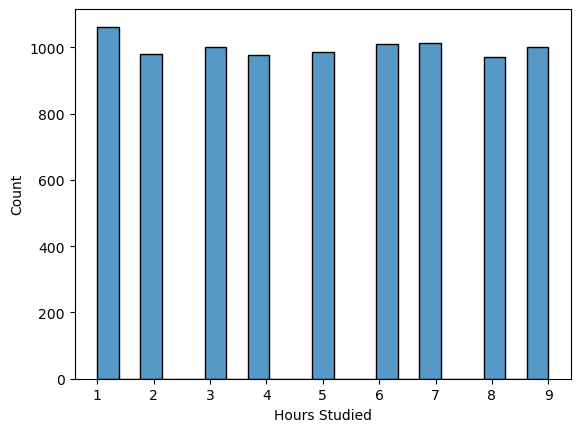

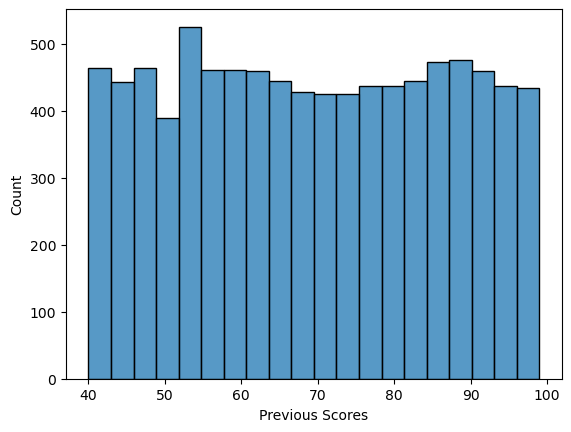

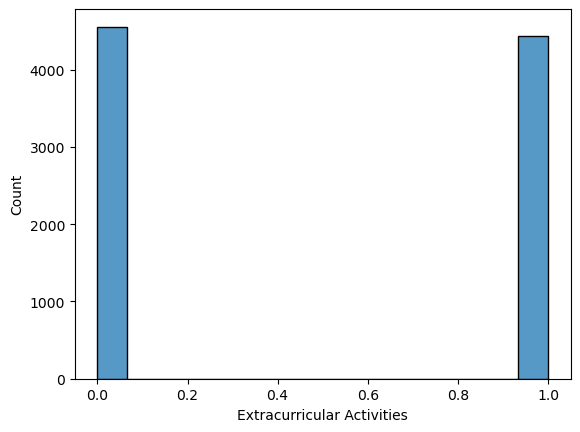

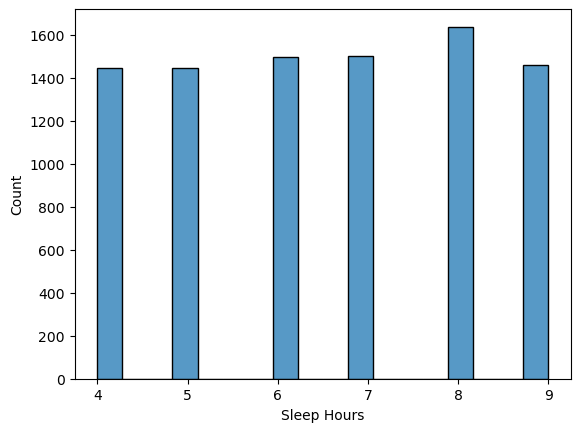

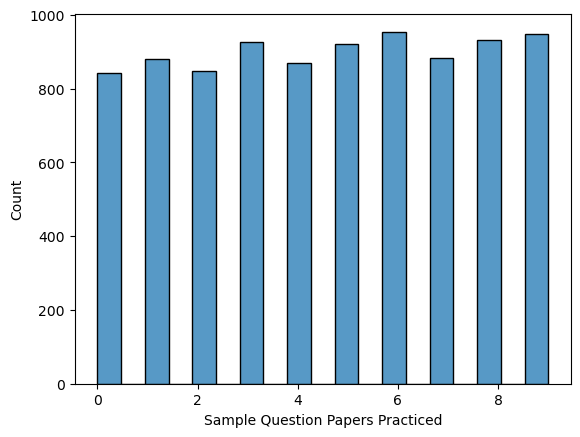

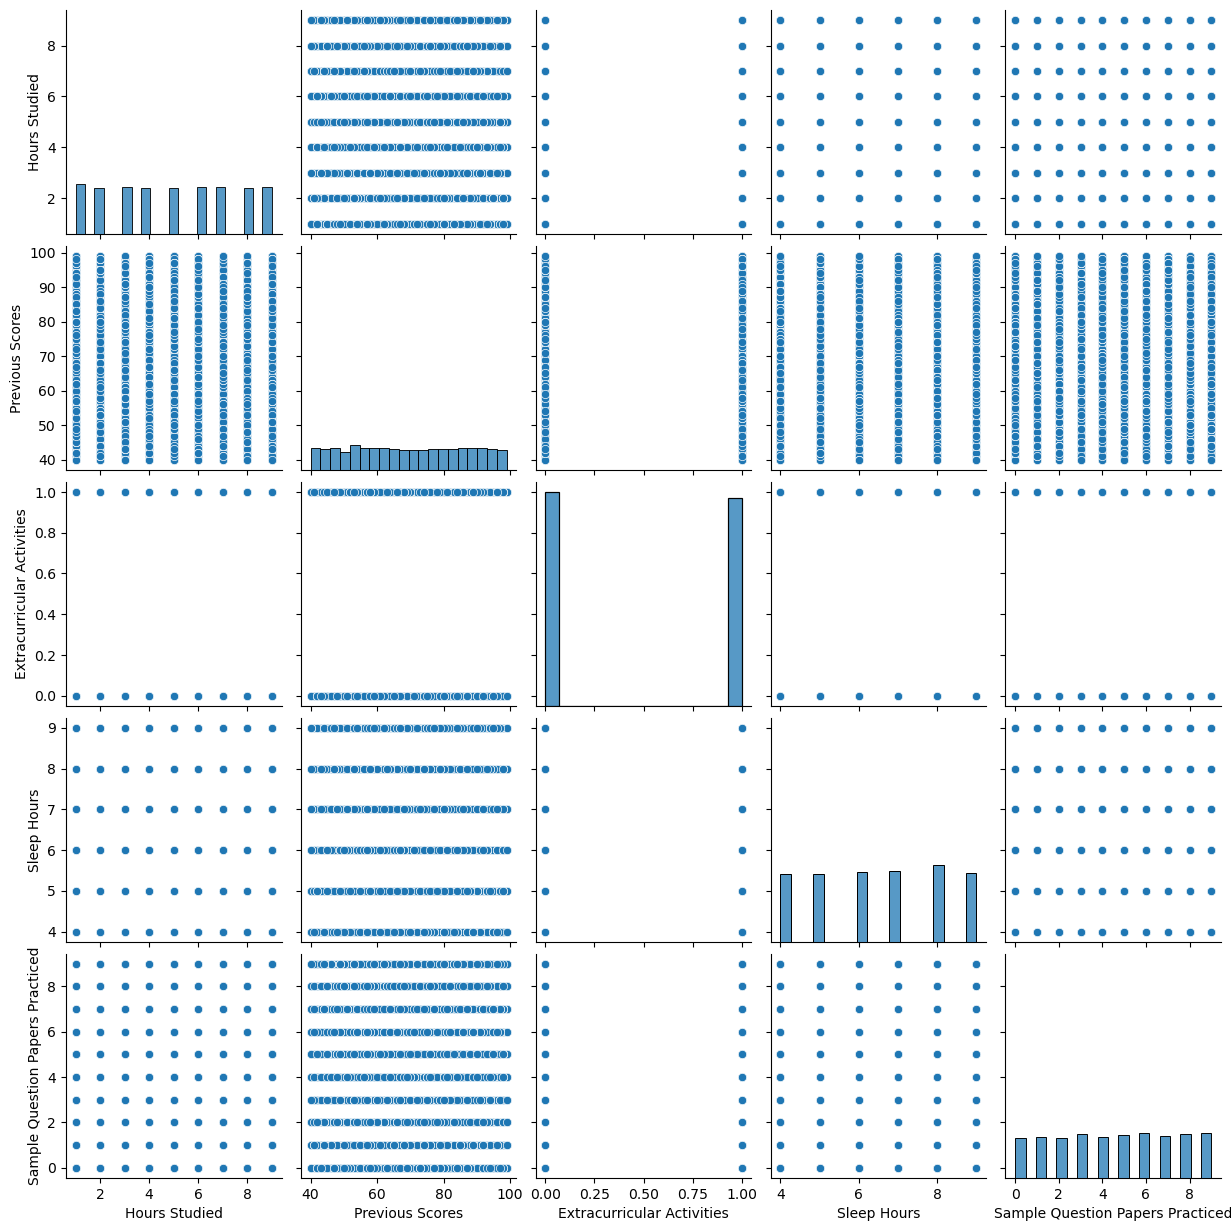

In [5]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện

for column in X_train.columns:
  sns.histplot(X_train[column])
  plt.show()
  
sns.pairplot(X_train)

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [6]:
# Phần code cho yêu cầu 2a

W = fit(X_train, y_train)

W.round(3)

array([-33.969,   2.852,   1.018,   0.604,   0.474,   0.192])

In [7]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra

y_pred = predict(W, X_test)

MAE = mean_absolute_error(y_test, y_pred)

print("\nMAE = ",MAE.round(3))



MAE =  1.596


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -33.969 + 2.852*Hour Studied + 1.018*Previous Scores + 0.604*Extracurricular Activities + 0.474*SleepHours + 0.192*Sample Question Papers Practiced $$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [8]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

shuffled_X_train = X_train.iloc[indices, :]

for i in shuffled_X_train.columns:
    X_i = shuffled_X_train[i]
    MAE = []
    
    for train_index, val_index in kf.split(X_i):
        X_train_fold, X_val_fold = X_i[train_index], X_i[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        W_i = fit(pd.DataFrame(X_train_fold), y_train_fold)
        
        y_pred_i = predict(W_i, pd.DataFrame(X_val_fold))
        MAE.append(mean_absolute_error(y_val_fold, y_pred_i))
        
    print("Feature:", i)
    print("MAE:", np.mean(MAE).round(3))
    print("")


Feature: Hours Studied
MAE: 15.451

Feature: Previous Scores
MAE: 6.619

Feature: Extracurricular Activities
MAE: 16.196

Feature: Sleep Hours
MAE: 16.187

Feature: Sample Question Papers Practiced
MAE: 16.185



In [9]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

best_feature_model = fit(X_train['Previous Scores'].to_numpy().reshape(-1, 1), y_train)

best_feature_model.round(3)

array([-14.989,   1.011])

In [10]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model

MAE = mean_absolute_error(y_test, predict(best_feature_model, X_test['Previous Scores'].to_numpy().reshape(-1, 1)))

MAE.round(3)

6.544

Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011*Previous Scores$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [11]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

# Thực hiện xáo trộn dữ liệu một lần duy nhất

indices = np.random.shuffle(np.arange(len(X_train)))
new_shuffled_X_train = X_train.iloc[indices:,]

# Bộ dữ liệu loại bỏ đặc trưng 'Extracurricular Activities'
NoBoleanAttributes = new_shuffled_X_train.copy().drop(columns='Extracurricular Activities')

# Bộ dữ liệu chứa 2 đặc trưng 'Hours Studied' và 'Sleep Hours'
HoursStudied_SleepHours = new_shuffled_X_train[['Hours Studied', 'Sleep Hours']]

# Bộ dữ liệu chứa 3 đặc trưng 'Hours Studied', 'Previous Scores' và 'Sleep Hours'
HoursStudied_SleepHours_PreviousScores = new_shuffled_X_train[['Hours Studied', 'Sleep Hours', 'Previous Scores']]

# Bộ dữ liệu chứa 2 đặc trưng 'Hours Studied' và 'Sleep Hours' với đặc trưng mới 'Hours Studied + Sleep Hours'
HoursStudied_ADD_SleepHours_PreviousScores = pd.DataFrame(new_shuffled_X_train.copy().drop(columns=['Hours Studied','Sleep Hours']))
HoursStudied_ADD_SleepHours_PreviousScores['Hours Studied + Sleep Hours'] = new_shuffled_X_train['Hours Studied'] + new_shuffled_X_train['Sleep Hours']


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [12]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

model_1 = fit_with_K_Fold_CV(NoBoleanAttributes, y_train, 5)
model_2 = fit_with_K_Fold_CV(HoursStudied_SleepHours, y_train, 5)
model_3 = fit_with_K_Fold_CV(HoursStudied_SleepHours_PreviousScores, y_train, 5)
model_4 = fit_with_K_Fold_CV(HoursStudied_ADD_SleepHours_PreviousScores, y_train, 5)


print(f"Model 1: MAE = {model_1['MAE']}, MSE = {model_1['MSE']}" )
print(f"Model 2: MAE = {model_2['MAE']}, MSE = {model_2['MSE']}" )
print(f"Model 3: MAE = {model_3['MAE']}, MSE = {model_3['MSE']}" )
print(f"Model 4: MAE = {model_4['MAE']}, MSE = {model_4['MSE']}" )
print("\n")

Model 1: MAE = 1.642, MSE = 4.255
Model 2: MAE = 15.441, MSE = 317.397
Model 3: MAE = 1.702, MSE = 4.56
Model 4: MAE = 3.24, MSE = 15.585




<h4><b> Kết luận : Mô hình tốt nhất trong số các mô hình được thiết kế là mô hình 1 được thiết kế bằng việc bỏ đi cột 'Extracurricular Activities' và sử dụng 4 đặc trưng còn lại.</b></h4>

In [15]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

new_X_train = X_train.copy().drop(columns='Extracurricular Activities')

W = fit(new_X_train, y_train)

y_pred = predict(W,X_test.copy().drop(columns='Extracurricular Activities'))

W.round(3)

array([-33.665,   2.853,   1.018,   0.47 ,   0.193])

In [16]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

MAE = mean_absolute_error(y_pred,y_test)

MAE.round(3)

1.614

Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = 2.853*Hours Studied + 1.018*Previous Scores + 0.47*Sleep Hours + 0.193*Sample Question Papers Practiced -33.665$$